El objetivo de este código es determinar los tópicos predominantes en cada conversación del corpus compuesto por la desgrabación de 640 llamadas. Cada desgrabación corresponde a un llamado en el que interviene un cliente y un agente de un contact center


In [105]:
import pandas as pd
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fafernan2101\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fafernan2101\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
# Cargar los archivos csv
ruta = 'C:/Users/Fafernan2101/Desktop/Ejercicio/corpus/*.csv'  
archivos = glob.glob(ruta)

In [117]:
# Crear una lista para almacenar los textos
textos = []
for archivo in archivos:
    df = pd.read_csv(archivo, header=None , engine = 'python', sep=';')
    texto = ' '.join(df.iloc[1].dropna().tolist())  # Concatena el contenido de todas las columnas en la segunda fila
    textos.append(texto)

In [143]:
# Preprocesamiento: tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))
# Agregar palabras adicionales a la lista de palabras vacías
palabras_adicionales = ['hola', 'si', 'aló','muchas', 'gracias','agradezco', 'buenas', 'tardes', 'disculpe','señora','habla', 'buenos', 'voy','perfecto','claro','número','dias', 'usted', 'mire', 'mira', 'entonces','favor','día','okay','arroba','aquí','ahí','nombre',
                        'cero','uno', 'dos', 'tres','cuatro' , 'cinco' , 'seis','siete','ocho','nueve','diez','catorce','quince','treinta','cuarenta','cincuenta','noventa','mil']

In [144]:
stop_words.update(palabras_adicionales)
textos_procesados = [[word for word in word_tokenize(texto.lower()) if word.isalpha() and word not in stop_words] for texto in textos] 

In [145]:
# Imprimir un ejemplo de texto procesado
print(textos_procesados[0])

['valeria', 'escuché', 'josé', 'josé', 'sabes', 'bueno', 'constantemente', 'así', 'digo', 'tiempo', 'cuarentena', 'ahora', 'pedido', 'recibir', 'ahora', 'hecho', 'guardando', 'fecha', 'entrega', 'lunes', 'minuto', 'llegaron', 'salí', 'comprar', 'rehaciendo', 'dejaron', 'conserjería', 'llegó', 'ahora', 'pedido', 'perdió', 'cadena', 'frío', 'ciertos', 'productos', 'dejando', 'pasar', 'todavía', 'congelador', 'carne', 'pollo', 'disfrutas', 'llegaron', 'olor', 'dinero', 'casa', 'frutilla', 'incomible', 'tan', 'tan', 'plata', 'igual', 'molesta', 'salmón', 'salmón', 'tampoco', 'congelado', 'peligroso', 'venían', 'cajas', 'mojadas', 'aseguraron', 'perdía', 'digamos', 'haberse', 'entregado', 'mismo', 'preocupaba', 'productos', 'encadene', 'frío', 'parecer', 'menos', 'encaja', 'caja', 'cartón', 'bueno', 'venía', 'viene', 'realidad', 'frutillas', 'vienen', 'mal', 'olor', 'tía', 'tía', 'todavía', 'abriendo', 'caja', 'vienen', 'mala', 'preocupa', 'viene', 'hablando', 'ver', 'caja', 'final', 'pedid

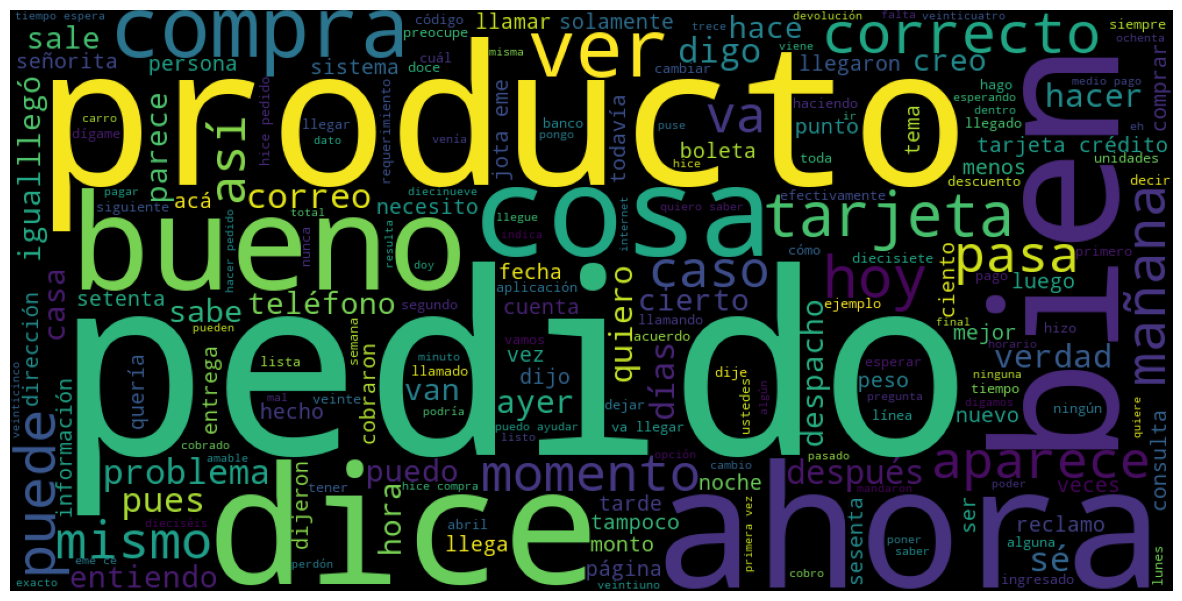

In [146]:
# Visualizacion de palabras más frecuentes

from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

# Concatena todos los textos en una sola cadena
texto = ' '.join([' '.join(texto) for texto in textos_procesados])

# Crea la nube de palabras
wordcloud = WordCloud(width = 1000, height = 500).generate(texto)

# Muestra la nube de palabras
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [147]:
# Crear un diccionario y un corpus para el modelado de tópicos
diccionario = corpora.Dictionary(textos_procesados)
corpus = [diccionario.doc2bow(texto) for texto in textos_procesados]

In [168]:
# Entrenar el modelo LDA para todo el corpus
lda_model_corpus = models.LdaModel(corpus, num_topics=3, id2word=diccionario, passes=10 , alpha = 0.01 , eta = 0.01 , iterations = 100)

In [169]:
# Imprimir los tópicos para todo el corpus
topics_corpus = lda_model_corpus.print_topics(num_words=10)
for topic in topics_corpus:
    print(topic)

(0, '0.020*"pedido" + 0.010*"correo" + 0.010*"tarjeta" + 0.010*"ahora" + 0.009*"dice" + 0.008*"compra" + 0.008*"hacer" + 0.007*"ver" + 0.006*"bueno" + 0.006*"producto"')
(1, '0.025*"pedido" + 0.012*"bien" + 0.010*"tarjeta" + 0.009*"compra" + 0.008*"va" + 0.008*"ahora" + 0.008*"hacer" + 0.008*"luego" + 0.007*"dice" + 0.007*"bueno"')
(2, '0.032*"pedido" + 0.010*"bueno" + 0.009*"tarjeta" + 0.009*"mañana" + 0.008*"hacer" + 0.008*"bien" + 0.008*"hoy" + 0.007*"puede" + 0.007*"compra" + 0.007*"ahora"')


In [174]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualizar los tópicos del modelo LDA para todo el corpus
vis_data = gensimvis.prepare(lda_model_corpus, corpus, diccionario)
pyLDAvis.display(vis_data)

#Comentario: fui jugando con los numeros de tópicos del modelo y concluí que 3 era un buen número ya que gráficamente se encuentran separados, mientras que a un mayour número de tópicos comienzan a superponerse
#Para observar el gráfico abrir manualmente plot.png (en la carpeta del proyecto) 

In [ ]:
# Usar el modelo LDA entrenado para obtener los tópicos de cada conversación
for texto in textos_procesados:
    # Crear un diccionario y un corpus para la conversación
    diccionario_conversacion = corpora.Dictionary([texto])
    corpus_conversacion = [diccionario_conversacion.doc2bow(texto)]


    # Verificar si la conversación contiene términos después del preprocesamiento
    if len(corpus_conversacion[0]) > 0:
        # Obtener los tópicos para la conversación usando el modelo LDA entrenado
        topics_conversacion = lda_model_corpus[corpus_conversacion]
        
        # Convertir los tópicos a una forma legible e imprimirlos
        for doc in topics_conversacion:
            print([(lda_model_corpus.id2word[id], freq) for id, freq in doc])


In [1]:
print("El modelo LDA se ha entrenado correctamente.")

El modelo LDA se ha entrenado correctamente.


In [3]:
for i in range(4):
    print("Tópico",i+1) 

Tópico 1
Tópico 2
Tópico 3
Tópico 4


In [1]:
print('this is the main branch')

this is the development branch
